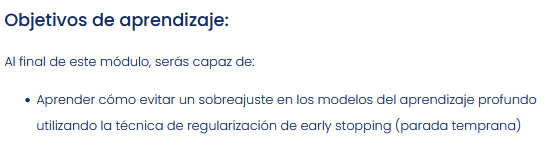

#Early stopping

Early stopping, o parada temprana, es exactamente como suena: paramos de entrenar el modelo temprano. En lugar de entrenar un cierto número de épocas, entrenamos el modelo hasta que la pérdida de validación comience a aumentar. Esto garantiza que nuestro modelo no se siga sobreajustando a medida que pasamos por más y más épocas.

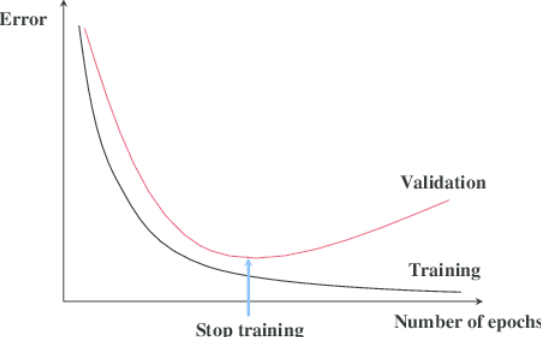

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv("https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/nba.csv",  index_col = 'Name')
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Limpia los datos y divide en X e y 

In [3]:
# Drop missings
df.dropna(inplace = True)
# Save X data
X = df.drop(columns = 'TARGET_5Yrs')
# Encode our target
y = df['TARGET_5Yrs']


Divide train/test 

In [4]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)


Escala los datos 

In [5]:
# Scale our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Comparemos el rendimiento de un modelo con y sin early stopping. Empezaremos creando un modelo sin early stopping.

Crea una red neuronal prealimentada

In [6]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape


19

In [7]:
# Without early stopping
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=100)



Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.6905 - val_loss: 0.6407
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6246 - val_loss: 0.6047
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6057 - val_loss: 0.5927
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5958 - val_loss: 0.5881
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5899 - val_loss: 0.5833
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.5798
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5812 - val_loss: 0.5790
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5754
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5749 - val_loss: 0.5725
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5712 - val_loss: 0.5707
Epoch 11/

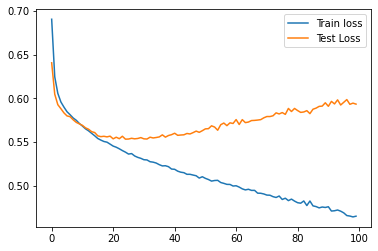

In [8]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

Caray, nuestro modelo está muy sobreajustado. Observa cómo la pérdida de entrenamiento continua disminuyendo a medida que la pérdida en la prueba comienza a aumentar cuando aumentamos el número de épocas para las que entrenamos nuestro modelo. Este es un problema muy común con redes neuronales y nos dice que nuestro modelo está sobreajustado y que no está funcionando bien con los datos ocultos.

Creemos este mismo modelo con early stopping para intentar evitar el sobreajuste, deteniéndose cuando la pérdida de validación comienza a aumentar.

In [9]:
# With early stopping
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
early_stopping = EarlyStopping(patience = 5)
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=100,
                    callbacks = [early_stopping])



Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.6689 - val_loss: 0.6314
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6187 - val_loss: 0.5978
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5975 - val_loss: 0.5845
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5829 - val_loss: 0.5785
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5742 - val_loss: 0.5776
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5676 - val_loss: 0.5776
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5629 - val_loss: 0.5742
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5587 - val_loss: 0.5711
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5558 - val_loss: 0.5713
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5525 - val_loss: 0.5710
Epoch 11/

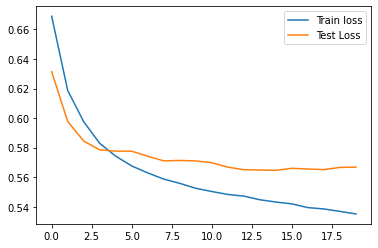

In [10]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();



Esto está mucho menos sobreajustado, ya que solo entrenamos alrededor de 18 épocas (el tuyo podría haber entrenado para un número ligeramente diferente de épocas). Early stopping puede evitar el sobreajuste y ahorrarte tiempo de entrenamiento.

También puedes utilizar dropout y early stopping en el mismo modelo.

In [10]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')